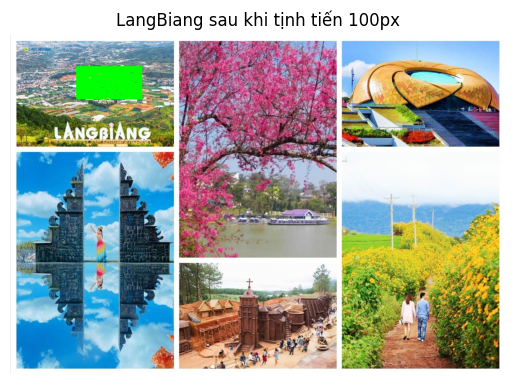

In [1]:
##1
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Đọc ảnh từ thư mục exercise
image_path = "exercise/dalat.jpg"  # Đặt đúng tên ảnh nếu khác
image = cv2.imread(image_path)

if image is None:
    print("Không tìm thấy ảnh. Kiểm tra lại đường dẫn.")
    exit()

# Chuyển ảnh sang thang xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng Otsu để tìm ngưỡng tự động
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Nếu muốn áp ngưỡng cụ thể 0.3 (theo yêu cầu đề bài)
threshold_value = int(0.3 * 255)
_, binary = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

# Tìm vùng LangBiang thủ công (ví dụ: chọn ROI tại một vùng có sẵn)
# Bạn có thể chỉnh tọa độ vùng chọn tùy vào ảnh thực tế
x, y, w, h = 100, 100, 200, 100  # (x, y, width, height)
roi = binary[y:y+h, x:x+w]

# Tịnh tiến sang phải 100px
translated = np.zeros_like(binary)
translated[y:y+h, x+100:x+100+w] = roi

# Áp vùng tịnh tiến vào ảnh gốc để trực quan hơn
result = image.copy()
result[translated == 255] = [0, 255, 0]  # Tô màu vùng LangBiang tịnh tiến bằng màu xanh lá

# Lưu ảnh
cv2.imwrite("lang_biang.jpg", result)

# Hiển thị kết quả
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("LangBiang sau khi tịnh tiến 100px")
plt.axis("off")
plt.show()


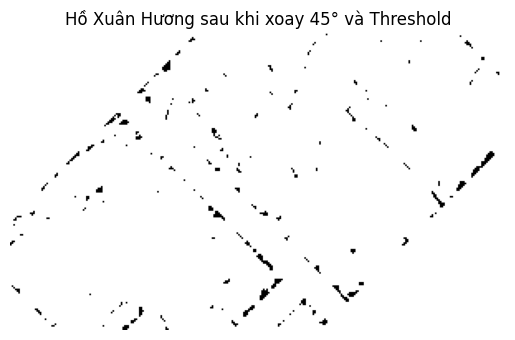

In [10]:
##2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ thư mục exercise
image_path = "exercise/dalat.jpg"  # Cập nhật đúng tên file nếu khác
image = cv2.imread(image_path)

if image is None:
    print("Không tìm thấy ảnh.")
    exit()

# Chuyển sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Chọn vùng ảnh Hồ Xuân Hương (ví dụ: bạn cần xác định tọa độ này cho đúng)
x, y, w, h = 375, 200, 300, 180  # Điều chỉnh lại nếu cần
roi = gray[y:y+h, x:x+w]

# Xoay 45 độ quanh tâm vùng chọn
(h_roi, w_roi) = roi.shape
center = (w_roi // 2, h_roi // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_roi = cv2.warpAffine(roi, rotation_matrix, (w_roi, h_roi), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=255)

# Áp dụng Adaptive Thresholding
thresholded = cv2.adaptiveThreshold(rotated_roi, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=60)

# Lưu kết quả
cv2.imwrite("ho_xuan_huong.jpg", thresholded)

# Hiển thị ảnh
plt.imshow(thresholded, cmap='gray')
plt.title("Hồ Xuân Hương sau khi xoay 45° và Threshold")
plt.axis("off")
plt.show()


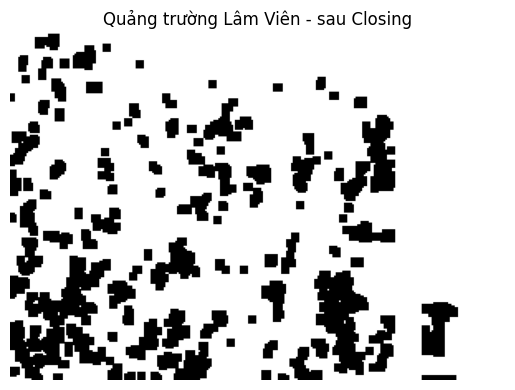

In [11]:
##3
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
image = cv2.imread("exercise/dalat.jpg")  # Đặt đúng đường dẫn nếu khác

if image is None:
    print("Không tìm thấy ảnh.")
    exit()

# Chuyển sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Cắt vùng Quảng Trường Lâm Viên
x, y, w, h = 755, 30, 300, 210
roi = gray[y:y+h, x:x+w]

# Ánh xạ tọa độ (Coordinate Mapping: ví dụ đơn giản là làm giãn kích thước vùng)
mapped = cv2.resize(roi, (w, h), interpolation=cv2.INTER_LINEAR)

# Nhị phân ảnh
_, binary = cv2.threshold(mapped, 127, 255, cv2.THRESH_BINARY)

# Áp dụng Binary Closing (dilate → erode)
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Lưu ảnh kết quả
cv2.imwrite("quan_truong_lam_vien.jpg", closed)

# Hiển thị
plt.imshow(closed, cmap='gray')
plt.title("Quảng trường Lâm Viên - sau Closing")
plt.axis("off")
plt.show()


In [4]:
import cv2
import numpy as np

def coordinate_mapping(image):
    return cv2.resize(image, (image.shape[1], image.shape[0]))  # giữ nguyên để demo

def rotate(image, angle=45):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def scale(image, fx=1.5, fy=1.5):
    return cv2.resize(image, None, fx=fx, fy=fy)

def shift(image, dx=100, dy=0):
    matrix = np.float32([[1, 0, dx], [0, 1, dy]])
    return cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))

def adaptive_thresholding(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

def binary_dilation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    return cv2.dilate(binary, kernel)

def binary_erosion(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    return cv2.erode(binary, kernel)

def otsu(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, result = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return result

# Map chức năng
geo_funcs = {
    "coordinate_mapping": coordinate_mapping,
    "rotate": rotate,
    "scale": scale,
    "shift": shift
}

seg_funcs = {
    "adaptive_thresholding": adaptive_thresholding,
    "binary_dilation": binary_dilation,
    "binary_erosion": binary_erosion,
    "otsu": otsu
}

# Menu
print("Chọn 1 hoặc 2 chức năng:")
print("Geometric transformation:", list(geo_funcs.keys()))
print("Segmentation:", list(seg_funcs.keys()))

# Input
geo_choice = input("Chọn 1 chức năng geometric_transformation (Enter để bỏ qua): ")
seg_choice = input("Chọn 1 chức năng segment (Enter để bỏ qua): ")

# Đọc ảnh
image = cv2.imread("exercise/dalat.jpg")
if image is None:
    print("Không tìm thấy ảnh.")
    exit()

result = image.copy()

# Áp dụng transformation nếu có
if geo_choice in geo_funcs:
    result = geo_funcs[geo_choice](result)

# Áp dụng segmentation nếu có
if seg_choice in seg_funcs:
    result = seg_funcs[seg_choice](result)

# Hiển thị kết quả
cv2.imshow("Kết quả", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


Chọn 1 hoặc 2 chức năng:
Geometric transformation: ['coordinate_mapping', 'rotate', 'scale', 'shift']
Segmentation: ['adaptive_thresholding', 'binary_dilation', 'binary_erosion', 'otsu']
